# **K-Vecinos más cercanos**
```
Versión   : 1.2, Para uso educativo
Autor     : Luis Beltran Palma Ttito
Lugar     : Cusco, Perú, 2023.
Proposito : K-NN en la clasificación de digitos manuscritos
```

# **1. PASO PREVIOS**

## Importación de librerías

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import random

# Librería: scikit learn, "sklearn"

# Módulo train_test_split: separación de datos para entrenamiento y test
from sklearn.model_selection import train_test_split
# Módulo KNeighborsClassifier: Implementa K-NN para clasificación
from sklearn.neighbors import KNeighborsClassifier
# Módulo classification_report: Métricas
from sklearn.metrics import classification_report
# Módulo accuracy_score: metrica de exactitud
from sklearn.metrics import accuracy_score
# Módulo confusion_matrix: matriz de confusión
from sklearn.metrics import confusion_matrix

## Importación de datos

In [ ]:
# leer el dataset
datos = pd.read_csv("digito16x16.csv", sep=',', header=0)
# muestras los primero 5 valores
datos.head()

,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,...,p248,p249,p250,p251,p252,p253,p254,p255,p256,digito
0,0,0,0,0,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,1,1,1,1,...,1,1,1,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
len(datos)

1593

In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1593 entries, 0 to 1592
Columns: 257 entries, p1 to digito
dtypes: int64(257)
memory usage: 3.1 MB


## Distribución de clases

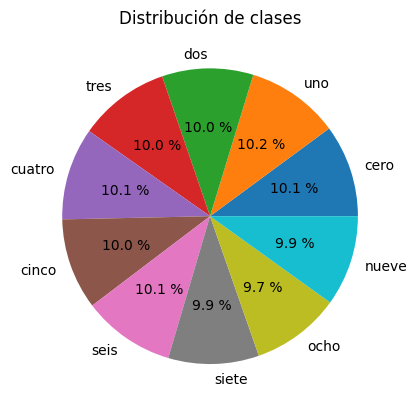

In [ ]:
# mostrar distribución de clases mediante un gráfico de pye
distribucion = datos.groupby('digito').size()
plt.pie(distribucion, labels = ['cero','uno','dos', 'tres','cuatro','cinco','seis','siete','ocho','nueve'], autopct="%0.1f %%")
plt.title('Distribución de clases')
plt.show()


## Visualización de datos

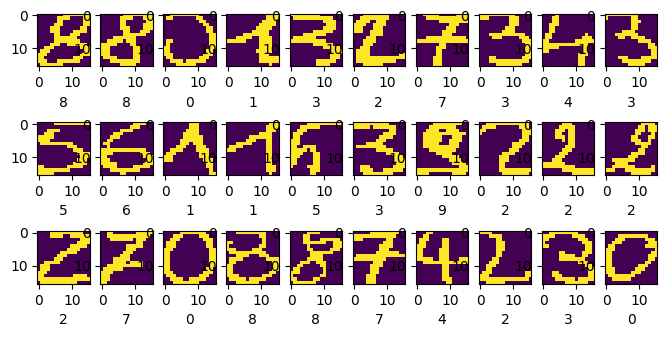

In [ ]:
#visualizar algunos datos aleatoriamente
X = datos.drop(['digito'], axis=1)
y = datos['digito']

ran = datos.shape[0]-1
fig, ax = plt.subplots(3, 10, figsize=(8,4))
for k in range(3):
    for j in range(10):
        azar = random.sample(range(ran),1)
        img = np.array(X.iloc[azar].values)
        img = np.array(img).reshape(16,16)
        ax[k,j].imshow(img)
        ax[k,j].set_xlabel(y[azar[0]])
plt.show()

# **2. SEPARACIÓN DE DATOS PARA TRAINIG Y TESTING**

In [ ]:
# Separación de datos en entrada y salida
X = datos.drop(['digito'], axis=1)
y = datos['digito']

# Separación de datos para entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=5)

# **3. ENTRENAMIENTO Y TEST DE K-NN**

In [ ]:
# Definición del modelo
k=5
Modelo = KNeighborsClassifier(n_neighbors = k)
# Entrenamiento del modelo
Modelo.fit(X_train, y_train)
# Test del modelo
Exactitud = Modelo.score(X_test, y_test)
print('Exactitud de K-NN (k=',k, '):', Exactitud)

Exactitud de K-NN (k= 5 ): 0.891213389121339


## Matriz de confusión y exactitud

In [ ]:
# Test del modelo
pred = Modelo.predict(X_test)
# Matriz de confusión
matriz = confusion_matrix(y_test, pred)
print(matriz)

[[52  0  0  0  0  0  1  0  0  0]
 [ 0 40  0  0  0  0  0  0  0  0]
 [ 0  0 42  0  1  0  0  1  0  0]
 [ 0  0  1 41  0  0  0  0  1  1]
 [ 0  4  0  0 41  0  0  0  0  0]
 [ 1  0  0  0  0 47  1  0  0  1]
 [ 2  0  0  0  0  1 55  0  0  0]
 [ 0  4  0  0  0  0  0 44  0  0]
 [ 0  2  4  3  0  2  1  0 26  1]
 [ 2  2  0  2  4  7  1  0  1 38]]


<Axes: >

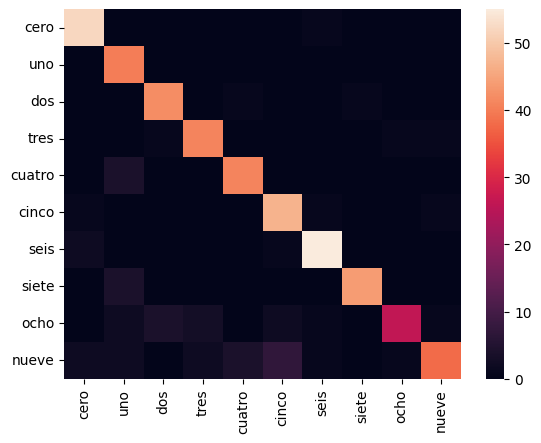

In [ ]:
#visualización de la matriz de confusión como un mapa de calor
categorias = ['cero','uno','dos', 'tres','cuatro','cinco','seis','siete','ocho','nueve']
sns.heatmap(matriz, yticklabels=categorias, xticklabels=categorias)

In [ ]:
from sklearn.metrics import accuracy_score
# Cálculo de acurracy (exactitud)
accuracy = accuracy_score(y_test, pred)
print('Exactitud: ',accuracy)

Exactitud:  0.891213389121339


In [ ]:
from sklearn.metrics import classification_report

# Cálculo de las métricas
report = classification_report(y_test, pred)

# Mostrar las métricas
print("Métricas de evaluación:")
print(report)

Métricas de evaluación:
              precision    recall  f1-score   support

           0       0.91      0.98      0.95        53
           1       0.77      1.00      0.87        40
           2       0.89      0.95      0.92        44
           3       0.89      0.93      0.91        44
           4       0.89      0.91      0.90        45
           5       0.82      0.94      0.88        50
           6       0.93      0.95      0.94        58
           7       0.98      0.92      0.95        48
           8       0.93      0.67      0.78        39
           9       0.93      0.67      0.78        57

    accuracy                           0.89       478
   macro avg       0.89      0.89      0.89       478
weighted avg       0.90      0.89      0.89       478



# **4. PREDICCIÓN DE NUEVOS CASOS**

In [ ]:
nuevo = np.array([[0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,
                   0,0,0,0,0,0,0,1,1,1,1,1,1,0,1,1,
                   0,0,0,0,0,0,1,1,1,0,0,0,0,0,1,1,
                   0,0,0,0,0,1,1,1,1,0,0,0,0,0,1,0,
                   0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,
                   0,0,0,1,1,1,0,1,0,1,0,1,0,0,0,0,
                   0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,
                   0,0,1,1,0,0,0,1,1,1,0,0,0,0,0,0,
                   0,1,1,1,0,1,1,1,1,1,1,1,1,1,1,0,
                   1,1,1,1,1,1,1,0,0,0,0,0,0,1,1,0,
                   1,1,1,1,1,0,0,0,0,0,0,0,0,1,1,1,
                   1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,
                   1,1,1,0,0,0,0,0,0,0,0,0,1,1,1,0,
                   1,1,1,1,0,0,0,0,0,0,1,1,1,1,0,0,
                   1,1,1,0,1,1,1,0,1,1,1,1,0,0,0,0,
                   0,1,1,1,1,1,1,0,0,0,1,0,0,0,0,0]])

In [ ]:
y_pred = Modelo.predict(nuevo)
# mostrar el resultado de la clasificación del dígito
print('El dígito es: ',y_pred[0])

El dígito es:  6


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


# **4. PRÁCTICA**


Aplicar el algoritmo k-NN para clasificar expresiones faciales de **fer2013.csv**.
